In [30]:
import pandas as pd
from itertools import islice
import datetime
import seaborn as sns
sns.set(style='darkgrid')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
# reading in Client with Probe type as Client1
#source = 'data/820Metrotech_test.txt'
source1 = 'data/Kismet-20170421-14-10-27-1.txt'
clients1 = []
with open(source1, 'r') as f:
    for i, client in enumerate(f):
        if 'Client' in client:
            client = client.replace(':',';',1)
            for j in range(i, i+8):
                n = f.next()
                if 'First' in n:
                    F = n
                if 'Last' in n:
                    L = n
                if 'Type' in n:
                    T = n
                    
                j+= 1
               
            clients1.append(client+';'+F+';'+L +';' + T)
            #print n

In [8]:
len(clients1)

1878

In [17]:
# check multi client records
client2 = []
with open(source1, 'r') as f:
    num1 = 0
    num2 = 0
    num3 = 0
    num4 = 0
    num5 = 0
    num6 = 0
    num7 = 0
    num8 = 0
    num9 = 0
    num10 = 0
    for i, client in enumerate(f):
        if 'Client 1' in client:
            num1 += 1
        if 'Client 2' in client:
            num2 += 1
        if 'Client 3' in client:
            num3 += 1
        if 'Client 4' in client:
            num4 += 1
        if 'Client 5' in client:
            num5 += 1
        if 'Client 6' in client:
            num6 += 1
        if 'Client 7' in client:
            num7 += 1
        if 'Client 8' in client:
            num8 += 1
        if 'Client 9' in client:
            num9 += 1
        if 'Client 10' in client:
            num10 += 1


1560


In [19]:
multi_rec = [num1, num2, num3, num4, num5, num6, num7, num8, num9, num10]

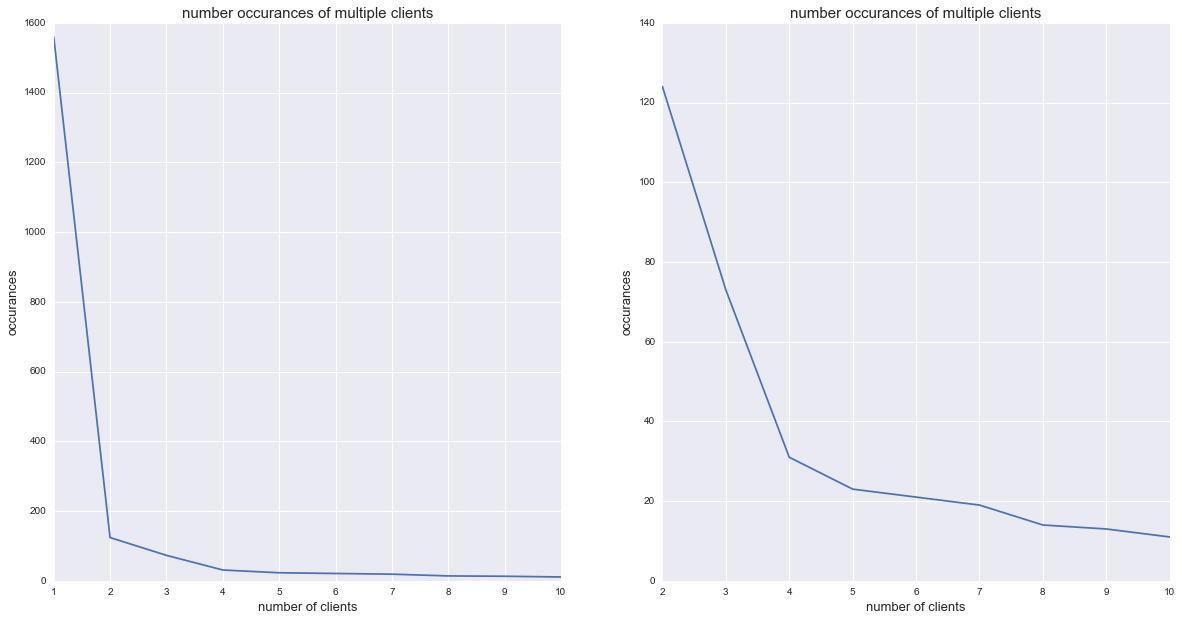

In [39]:
# plot multi clients
plt.figure(figsize = [20,10])
plt.subplot(121)
plt.plot(range(1,11), multi_rec)
plt.title('number occurances of multiple clients', fontsize = 15)
plt.xlabel('number of clients', fontsize = 13)
plt.ylabel('occurances', fontsize = 13)

plt.subplot(122)
plt.plot(range(2,11), multi_rec[1:])
plt.title('number occurances of multiple clients', fontsize = 15)
plt.xlabel('number of clients', fontsize = 13)
plt.ylabel('occurances', fontsize = 13)

plt.savefig('./visuals/num_occur_multi_clients.png')


In [40]:
df = pd.DataFrame(columns=['client', 'MAC','first','last', 'type'])

In [42]:
## Add Clients to dataframe
for client in clients1:
    df = df.append(pd.Series(client.split(';'), index=['client','MAC','first','last', 'type']), ignore_index=True)

In [48]:
## Clean up MACA Address column
df.MAC = df.MAC.str.replace('MAC ' , '')
df.MAC = df.MAC.str.replace(r'\n','')
df['first'] = df['first'].str.replace(' First      : ' , '')
df['first'] = df['first'].str.replace(r'\n','')
df['last'] = df['last'].str.replace(' Last       : ' , '')
df['last'] = df['last'].str.replace(r'\n','')

In [49]:
df.head()

,client,MAC,first,last,type
0,Client 1,00:00:00:00:00:00,Fri Apr 21 14:10:31 2017,Fri Apr 21 15:10:24 2017,Type : Ad-hoc\n
1,Client 1,00:03:16:00:9A:2E,Fri Apr 21 15:05:45 2017,Fri Apr 21 15:05:45 2017,Type : From Distribution\n
2,Client 1,00:03:7F:00:00:00,Fri Apr 21 14:25:03 2017,Fri Apr 21 14:25:03 2017,Type : Ad-hoc\n
3,Client 1,00:04:20:EB:3F:B5,Fri Apr 21 14:37:45 2017,Fri Apr 21 14:47:52 2017,Type : Probe Request\n
4,Client 1,00:06:66:20:62:2E,Fri Apr 21 15:07:19 2017,Fri Apr 21 15:07:19 2017,Type : Ad-hoc\n


In [50]:
def time(row):
    
    week, month, day, time, year = row[3].split(' ')[1:]
    week1, month1, day1, time1, year1 = row[2].split(' ')[1:]
    time = datetime.datetime.strptime(time, '%H:%M:%S')
    time1 = datetime.datetime.strptime(time1, '%H:%M:%S')
    

    return time-time1

In [51]:
df['time_diff'] = df.apply(time, axis = 1)                            

In [52]:
df.MAC.head()

0     00:00:00:00:00:00
1     00:03:16:00:9A:2E
2     00:03:7F:00:00:00
3     00:04:20:EB:3F:B5
4     00:06:66:20:62:2E
Name: MAC, dtype: object

In [54]:
df['last'].head()

0     Fri Apr 21 15:10:24 2017
1     Fri Apr 21 15:05:45 2017
2     Fri Apr 21 14:25:03 2017
3     Fri Apr 21 14:47:52 2017
4     Fri Apr 21 15:07:19 2017
Name: last, dtype: object

In [55]:
num_first = df['first'].unique()
len(num_first)

1280

In [56]:
num_last = df['last'].unique()
# df['last'].value_counts()
len(num_last)

1309

In [58]:
## Get the number of Unique MAC addresses
num_macs = df.MAC.unique()
len(num_macs)

1733

In [61]:
df[df.MAC == ' 6C:20:56:6B:FE:20']

,client,MAC,first,last,type,time_diff
325,Client 24,6C:20:56:6B:FE:20,Fri Apr 21 14:10:28 2017,Fri Apr 21 15:10:27 2017,Type : From Distribution\n,00:59:59
352,Client 15,6C:20:56:6B:FE:20,Fri Apr 21 14:10:28 2017,Fri Apr 21 15:10:24 2017,Type : From Distribution\n,00:59:56
386,Client 20,6C:20:56:6B:FE:20,Fri Apr 21 14:10:31 2017,Fri Apr 21 15:10:24 2017,Type : From Distribution\n,00:59:53
420,Client 18,6C:20:56:6B:FE:20,Fri Apr 21 14:10:28 2017,Fri Apr 21 15:10:27 2017,Type : From Distribution\n,00:59:59
446,Client 9,6C:20:56:6B:FE:20,Fri Apr 21 14:12:23 2017,Fri Apr 21 15:10:16 2017,Type : From Distribution\n,00:57:53
454,Client 3,6C:20:56:6B:FE:20,Fri Apr 21 14:10:28 2017,Fri Apr 21 15:10:27 2017,Type : From Distribution\n,00:59:59


### A single MAC address covers multiple clients - If we assume a MAC suggests a router:

In [65]:
print 'from this experiment, we successfully detected {} devices from {} routers'.format(len(df), len(df.MAC.value_counts()))

from this experiment, we successfully detected 1878 devices from 1733 routers


### Some devices were detected to have very short time period - it could still mean they were physically around the location

In [67]:
print 'number of devices detected with very short time period:'
print df[df['first'] != df['last']].shape[0]

number of devices detected with very short time period:
903


### However, devices with very long time period can be: 
- staying around the area for other matters
## Thus, consider removing records with long time difference

In [71]:
from datetime import timedelta

In [79]:
df_long = df[df.time_diff > pd.tslib.Timedelta('0 days 00:59:00')]

In [80]:
print '{} detcected records have time difference longer than 59 minutes'.format(len(df_long))

57 detcected records have time difference longer than 59 minutes


In [81]:
df_test = df[df.time_diff <= pd.tslib.Timedelta('0 days 00:59:00')]

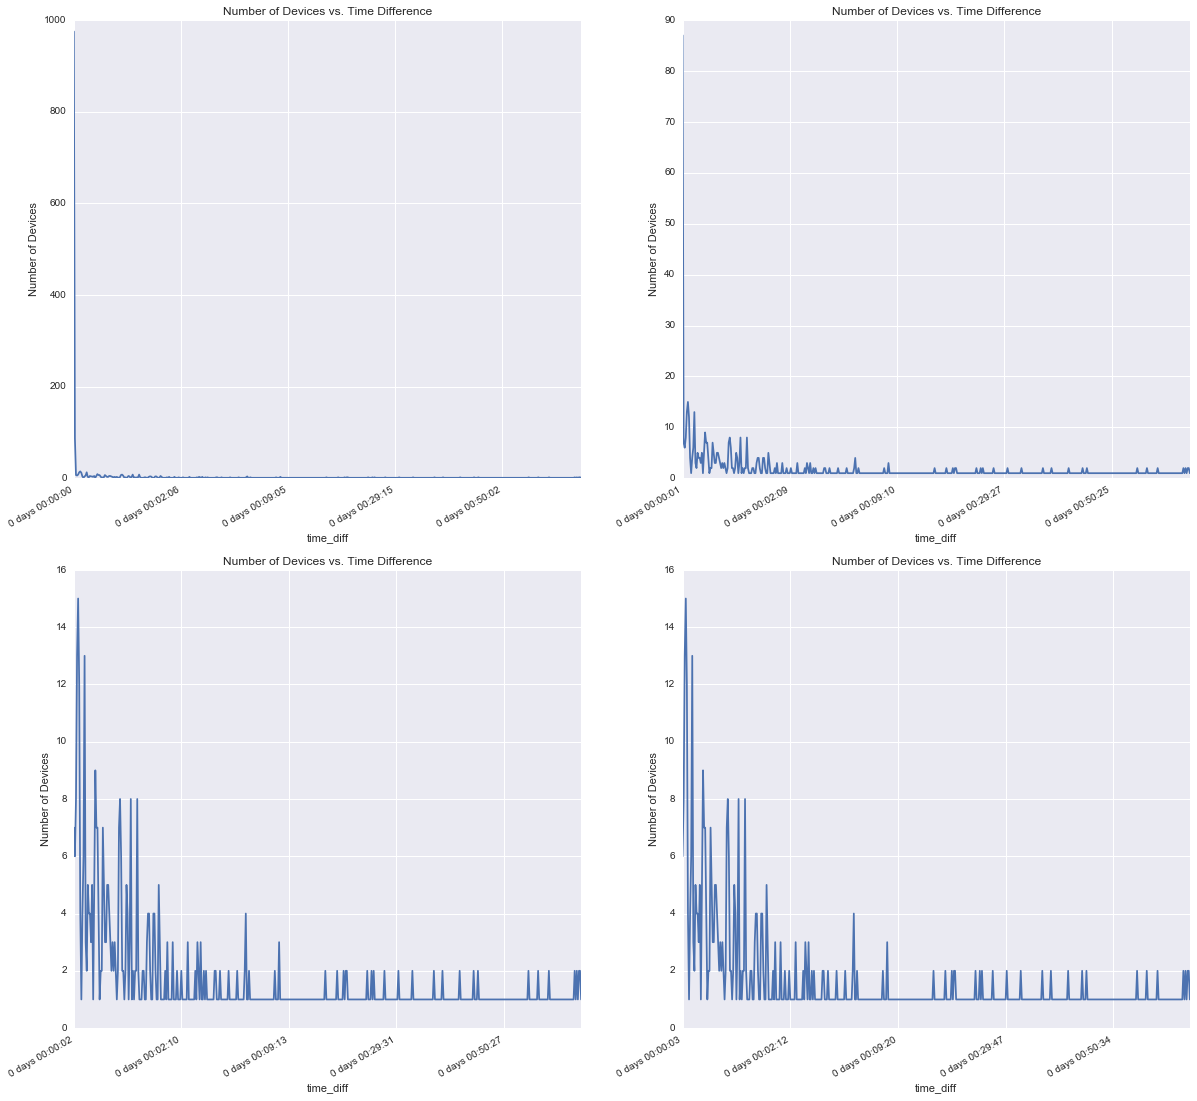

In [159]:
df_plot = df_test.groupby('time_diff').size()
plt.figure(figsize = [20,20])

plt.subplot(221, xlabel = 'Time Difference', ylabel = 'Number of Devices', title = 'Number of Devices vs. Time Difference')
df_plot.plot()
plt.subplot(222, xlabel = 'Time Difference', ylabel = 'Number of Devices', title = 'Number of Devices vs. Time Difference')
df_plot[1:].plot()
plt.subplot(223, xlabel = 'Time Difference', ylabel = 'Number of Devices', title = 'Number of Devices vs. Time Difference')
df_plot[2:].plot()
plt.subplot(224, xlabel = 'Time Difference', ylabel = 'Number of Devices', title = 'Number of Devices vs. Time Difference')
df_plot[3:].plot()

plt.savefig('./visuals/num_dev_timediff.png')

In [ ]:
# Categorize time difference into 10 bins

labeled =x pd.cut(df_test.time_diff.apply(lambda x: x.total_seconds()), 10, labels = range(10))
df_test['time_label'] = labeled

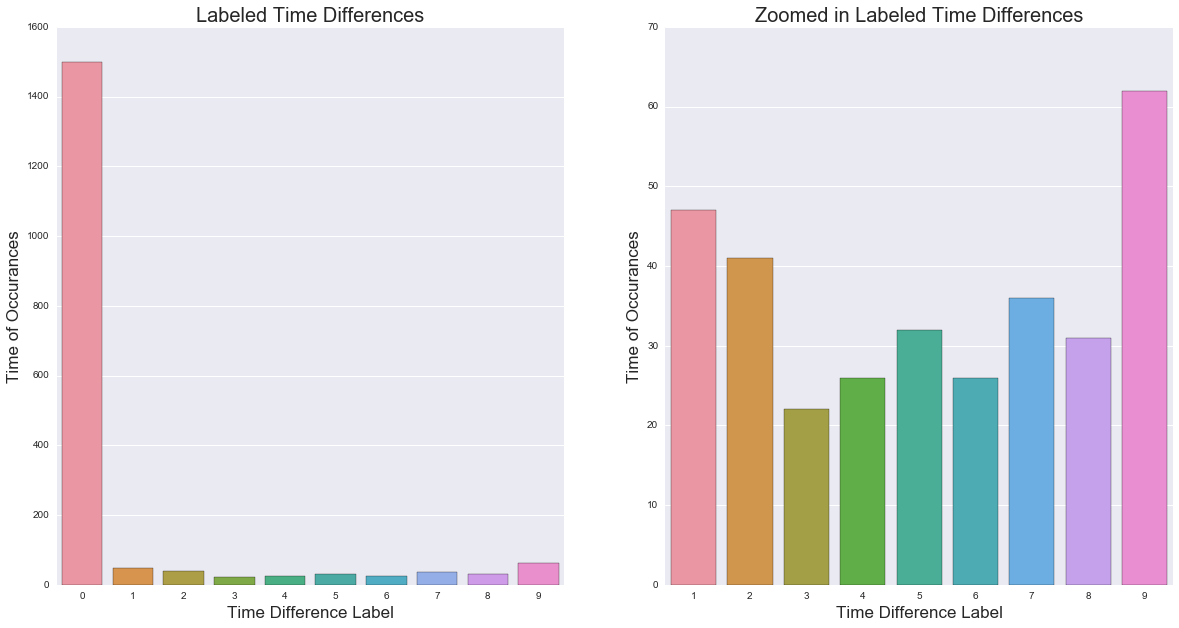

In [158]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.barplot(range(10),df_test.groupby('time_label').size())
plt.title('Labeled Time Differences', fontsize = 20)
plt.xlabel('Time Difference Label', fontsize = 17)
plt.ylabel('Time of Occurances', fontsize = 17)

plt.subplot(122)
sns.barplot(range(1,10),df_test.groupby('time_label').size()[1:])
plt.title('Zoomed in Labeled Time Differences', fontsize = 20)
plt.xlabel('Time Difference Label', fontsize = 17)
plt.ylabel('Time of Occurances', fontsize = 17)

plt.savefig('./visuals/labeled_time_diff.png', fontsize = 20)

## filter out multi clients networks 
## make viz nicer 
## Frequency? proxy for distance 
 